In [1]:
import tensorflow as tf
import numpy as np
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [3]:
# cats_and_dogs 데이터셋 다운로드
data = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(data, 'cats_and_dogs_filtered.zip')

('cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x1ec7359f070>)

In [4]:
local_zip = 'C:\\Users\\user\\Desktop\\dd\\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp2/cats_and_dogs/')
zip_ref.close()

data_dir = 'tmp2/cats_and_dogs'

In [2]:
import os
train_cats_dir = os.path.join('tmp2/cats_and_dogs/cats_and_dogs_filtered/train/cats')
train_dogs_dir = os.path.join('tmp2/cats_and_dogs/cats_and_dogs_filtered/train/dogs')
validation_cats_dir = os.path.join('tmp2/cats_and_dogs/cats_and_dogs_filtered/validation/cats')
validation_dogs_dir = os.path.join('tmp2/cats_and_dogs/cats_and_dogs_filtered/validation/dogs')

train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)
validation_cats_names = os.listdir(validation_cats_dir)
validation_dogs_names = os.listdir(validation_dogs_dir)
                              

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')                             
                           
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [4]:
train_dir = 'tmp2/cats_and_dogs/cats_and_dogs_filtered/train'
validation_dir = 'tmp2/cats_and_dogs/cats_and_dogs_filtered/validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,                                   
                                  )
validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size = (300,300))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size = (300,300))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# 학습
# fit 호출시 1 epoch 마다 train 이미지 2000개 생성 
# fit 호출시 1 epoch 마다 validation 이미지 1000개 생성 
history = model.fit(train_generator, # X
          steps_per_epoch=100,  # 2000/20
          epochs=20,
          validation_data=validation_generator,
          validation_steps=50, # 1000/20
          verbose=1)

Epoch 1/20
100/100 [==============================] - 37s 368ms/step - loss: 0.4578 - accuracy: 0.7850 - val_loss: 0.4910 - val_accuracy: 0.7560
Epoch 2/20
100/100 [==============================] - 37s 365ms/step - loss: 0.4343 - accuracy: 0.7955 - val_loss: 0.4331 - val_accuracy: 0.7830
Epoch 3/20
100/100 [==============================] - 37s 364ms/step - loss: 0.4203 - accuracy: 0.8115 - val_loss: 0.4247 - val_accuracy: 0.8100
Epoch 4/20
100/100 [==============================] - 37s 366ms/step - loss: 0.4405 - accuracy: 0.8030 - val_loss: 0.4155 - val_accuracy: 0.8200
Epoch 5/20
100/100 [==============================] - 38s 384ms/step - loss: 0.4325 - accuracy: 0.8060 - val_loss: 0.3986 - val_accuracy: 0.8170
Epoch 6/20
100/100 [==============================] - 38s 382ms/step - loss: 0.4039 - accuracy: 0.8145 - val_loss: 0.4293 - val_accuracy: 0.8020
Epoch 7/20
100/100 [==============================] - 37s 367ms/step - loss: 0.4176 - accuracy: 0.8145 - val_loss: 0.4179 - val_ac

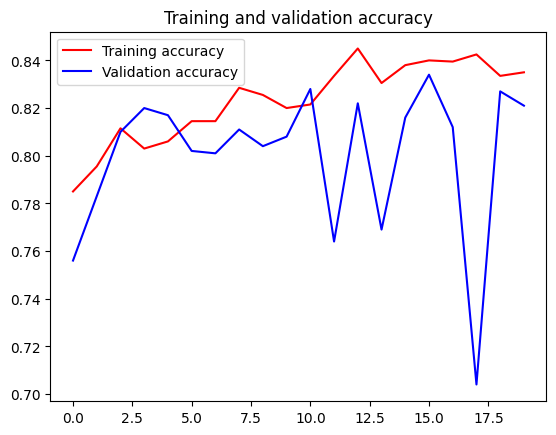

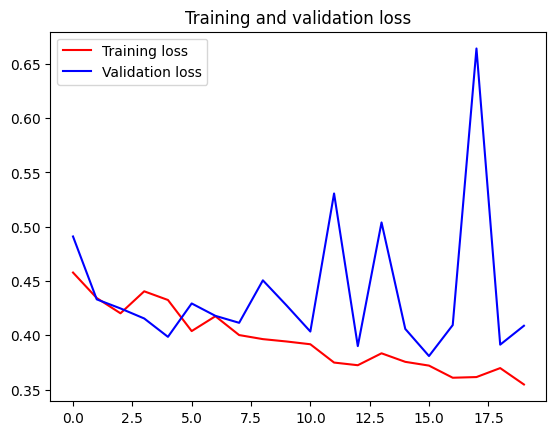

In [13]:
# 학습 결과 시각화 (옵션)
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()